In [1]:
ler_anbima_curva_credito <- function(data){
  stopifnot(is(data, "Date"), length(data)==1)
  library(httr)
  library(readr)
  url <- "https://www.anbima.com.br/informacoes/curvas-debentures/CD-down.asp"
  data <- as.Date("2020-06-08")
  tipo <- "form"
  idioma <- "PT"
  saida <- "csv"
  r <- POST(url = url, encode = tipo, body = list(Dt_ref = format(data, "%d/%m/%Y"),
                                                  Idioma = idioma,
                                                  saida = saida))
  txt <- content(r, encoding = "UTF-8")
  txt <- rawToChar(txt)
  dados <- read.csv2(text = txt, header = T, stringsAsFactors = F, skip = 1)
  dados$Data <- data
  return(View(dados))
}

In [3]:
grafico_anbima_curva_credito <- function(data){
  stopifnot(is(data, "Date"), length(data)==1)
  library(httr)
  library(readr)
  library(ggplot2)
  library(ggthemes)
  url <- "https://www.anbima.com.br/informacoes/curvas-debentures/CD-down.asp"
  tipo <- "form"
  idioma <- "PT"
  saida <- "csv"
  r <- POST(url = url, encode = tipo, body = list(Dt_ref = format(data, "%d/%m/%Y"),
                                                  Idioma = idioma,
                                                  saida = saida))
  txt <- content(r, encoding = "UTF-8")
  txt <- rawToChar(txt)
  dados <- read.csv2(text = txt, header = T, stringsAsFactors = F, skip = 1)
  dados$Data <- data
  dados <- data.frame(dados)
  ggplot(dados, aes(x = Vertices))+
    geom_line(aes(y = AAA, colour = "AAA"))+
    geom_line(aes(y = AA, colour = "AA"))+
    geom_line(aes(y = A, colour = "A"))+
    scale_colour_manual("Rating", values = c("AAA" = "red",
                                             "AA" = "blue",
                                             "A" = "green"))+
    labs(x = "Anos", y = "Spread %", title = "Curva de crédito",
         subtitle = format(data, "%d/%m/%Y"), caption = "Fonte:Anbima")+
    theme_economist()
}

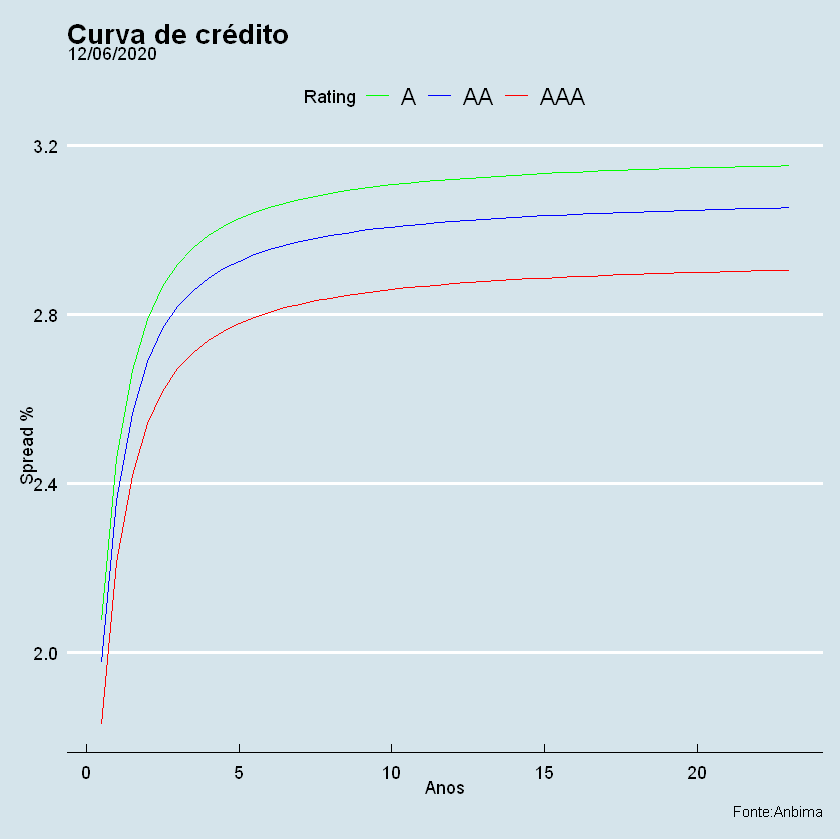

In [4]:
grafico_anbima_curva_credito(as.Date("2020-06-12"))